## Feature Engineering

In [1]:
# importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = catalog.load("cleaned_data")
data.head()

[06/14/23 00:33:15] INFO     Loading data from 'cleaned_data' (CSVDataSet)...                   ]8;id=645473;file://C:\Users\sgsid\anaconda3\envs\kedro-tutorial\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=235637;file://C:\Users\sgsid\anaconda3\envs\kedro-tutorial\lib\site-packages\kedro\io\data_catalog.py#345\345]8;;\

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# drop date column
processed_data = data.drop(['date'], axis=1)

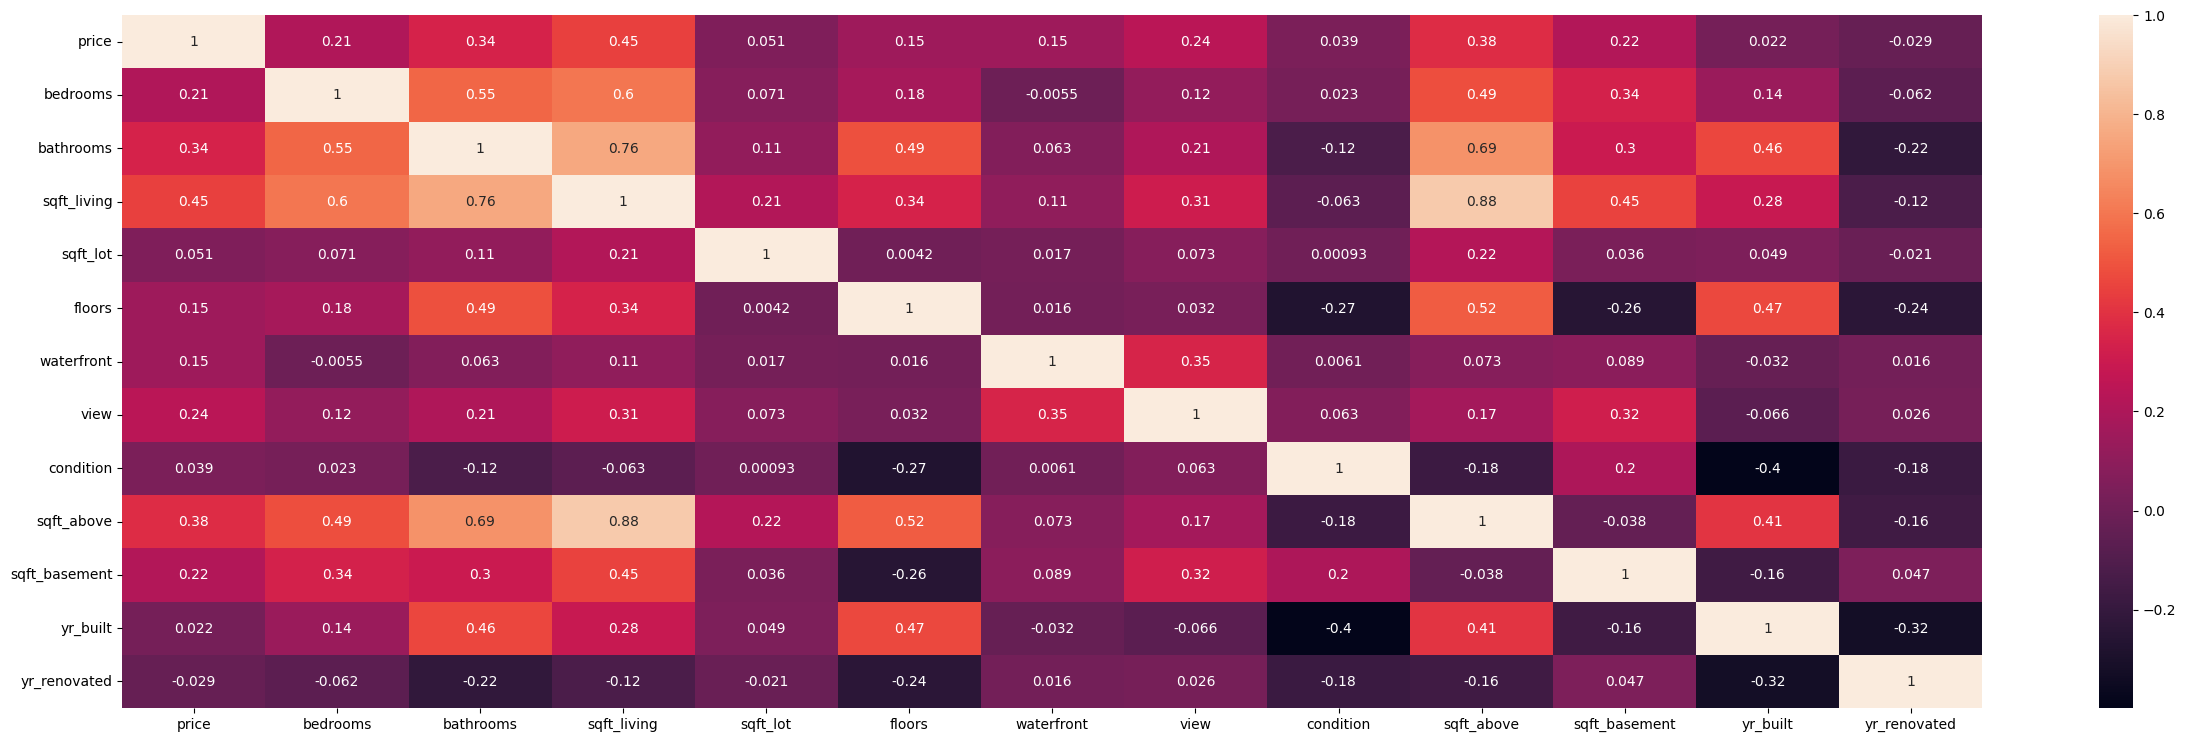

In [4]:
# check the correlations
# keep only the numeric variables
drop_cols = ['street', 'city', 'statezip', 'country']
data_for_cor = processed_data.drop(drop_cols, axis=1)
plt.figure(figsize=(30,9))
sns.heatmap(data_for_cor.corr(),annot=True);
plt.savefig('variables_cor.png')

In [5]:
# drop features with high positive correlation to avoid multicollinearity
processed_data = processed_data.drop(['sqft_above', 'bathrooms'], axis=1)
processed_data

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.130000e+05,3.0,1340,7912,1.5,0,0,3,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2.384000e+06,5.0,3650,9050,2.0,0,4,5,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.420000e+05,3.0,1930,11947,1.0,0,0,4,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4.200000e+05,3.0,2000,8030,1.0,0,0,4,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5.500000e+05,4.0,1940,10500,1.0,0,0,4,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,3.081667e+05,3.0,1510,6360,1.0,0,0,4,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4547,5.343333e+05,3.0,1460,7573,2.0,0,0,3,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4548,4.169042e+05,3.0,3010,7014,2.0,0,0,3,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4549,2.034000e+05,4.0,2090,6630,1.0,0,0,3,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [6]:
# split to numeric and categorical
num_cols = [col for col in processed_data.columns if processed_data[col].dtype in ['float64','int64']]
cat_cols = [col for col in processed_data.columns if processed_data[col].dtype not in ['float64','int64']]

In [7]:
# scale numeric
processed_data[num_cols] = MinMaxScaler().fit_transform(processed_data[num_cols])

In [8]:
# one-hot-encode categorical
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(processed_data[cat_cols])
encoded_cols = encoder.get_feature_names_out(cat_cols)
encoded_data = encoder.transform(processed_data[cat_cols])

# Create a DataFrame with the encoded columns
processed_data_encoded = pd.DataFrame(encoded_data, columns=encoded_cols)
processed_data = pd.concat([processed_data, processed_data_encoded], axis=1)
processed_data

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,...,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,country_USA
0,0.011481,0.333333,0.073652,0.006775,0.2,0.0,0.0,0.50,0.000000,0.482456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.089391,0.555556,0.249051,0.007835,0.4,0.0,1.0,1.00,0.058091,0.184211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.012572,0.333333,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,0.578947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.015507,0.333333,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,0.552632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.020397,0.444444,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,0.011300,0.333333,0.086560,0.005330,0.0,0.0,0.0,0.75,0.000000,0.473684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4547,0.019808,0.333333,0.082764,0.006460,0.4,0.0,0.0,0.50,0.000000,0.728070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4548,0.015390,0.333333,0.200456,0.005939,0.4,0.0,0.0,0.50,0.000000,0.956140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4549,0.007358,0.444444,0.130600,0.005581,0.0,0.0,0.0,0.50,0.211618,0.649123,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# Create training and validation sets
y = processed_data['price']
X = pd.concat([processed_data[num_cols], processed_data[encoded_cols]], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X, y,
                                                 test_size=0.25,
                                                 random_state=42)

In [10]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [11]:
#making dictionary of models
models = {
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [12]:
#taking results from the models
model_results = []
model_names = []

# training the model with function
for name,model in models.items():
    a = model.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)
    
    #creating dataframe
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
    
print(df_results)

                   Model      RMSE
0                    SVR  0.089711
3             ElasticNet  0.014107
4           SGDRegressor  0.009984
2                  Ridge  0.004589
5          BayesianRidge  0.003228
7  RandomForestRegressor  0.000807
1           XGBRegressor  0.000541
6       LinearRegression   0.00038


We won't get into further analysis on variables' importance and hyperparameters' tuning as the purpose of the notebook is to work as an example.